In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_json('data/review.json', lines=True)

In [49]:
import pandas as pd
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('data/reviews_Cell_Phones_and_Accessories_5.json.gz')
df.to_pickle('mobile.pkl')

In [2]:
df = pd.read_pickle('data/data_frames/Books_5.pkl')

In [13]:
df.shape

(100000, 9)

In [14]:
ratings = df['overall']
num_reviews = ratings.size

In [15]:
helpfulness = df['helpful']

In [16]:
min_helpfull_review = 5
temp = [i for i in range(num_reviews)  if helpfulness[i][1] > min_helpfull_review] 
len(temp)

21333

In [9]:
ratings = ratings[temp].reset_index()

In [10]:
ratings = ratings['overall']

In [11]:
helpfulness = helpfulness[temp].reset_index()

In [12]:
helpfulness = helpfulness['helpful']

In [13]:
len(ratings)

85627

In [14]:
prod = df['asin'][temp].reset_index()

In [7]:
df2 = df[['asin', 'helpful', 'overall', 'reviewerID']].iloc[temp].reset_index()

In [3]:
df2 = pd.read_pickle('data/data_frames/Books_5.pkl')

In [4]:
(df2['asin']).index.is_monotonic #this means sorted by item_id
#df.groupby('asin')

True

In [5]:
item_df = (df2['asin']).value_counts()
many_reviews = item_df[item_df > 500].index.values

In [33]:
df2.loc[df['asin'] == '0002051850'].size

240

In [8]:
items = df2['asin'].unique()
# df2.loc[df['asin'] == items[0]]
# items
# df2.loc[df['asin'] == '0002051850']

In [9]:
# X = []
# y = []
# for item in items:
#     unique_item = df2.loc[df2['asin'] == item]
#     average_rating = np.mean(unique_item['overall'])
#     for index, row in unique_item.iterrows():
#         y.append(row['helpful'][0] / row['helpful'][1])
#         X.append(row['overall'] - average_rating)
# #         print (row['helpful'][0] / row['helpful'][1])
# #     for vals in unique_item:
# #         y.append(vals[0]/vals[1])
# #         print (vals[0]/vals[1])
many_reviews = []
for item in items:
    unique_item = df2.loc[df2['asin'] == item]
    
    #size > 1000 means num > 200 because 5 columns are there
    if unique_item.size > 1000:
        many_reviews.append(item)
print (many_reviews)

['0002007770', '0002247399', '0007124015', '0007444117', '0007447868', '0026009102', '0060194480', '0060392452', '0060520841', '006073132X', '0060738170', '0060761288', '0060987103', '0061015733', '0061122416', '0061939897', '006204964X', '0062217208']


0425269205
7660
Average Rating = 3.239556135770235
Standard Deviation = 1.5344356465411608


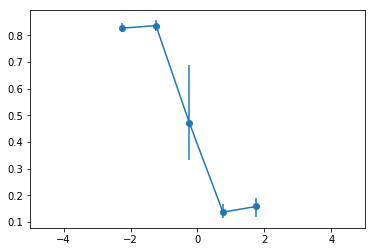

0345803485
7170
Average Rating = 2.113668061366806
Standard Deviation = 1.5632798429908643


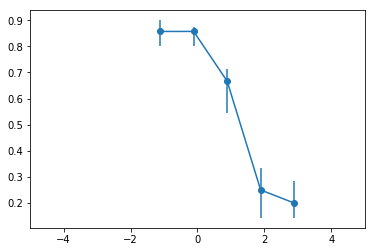

031604461X
6235
Average Rating = 3.4603047313552526
Standard Deviation = 1.6217707619549888


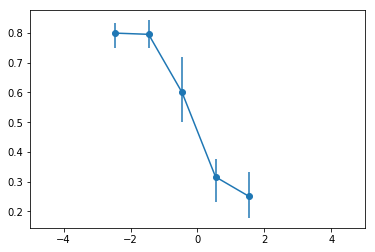

0002247399
5260
Average Rating = 3.2690114068441063
Standard Deviation = 1.4999587357642075


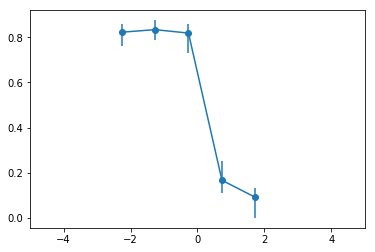

0007444117
5035
Average Rating = 3.2234359483614696
Standard Deviation = 1.7671635022579777


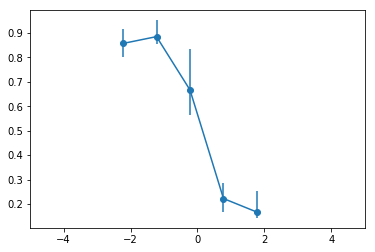

0618680004
3965
Average Rating = 3.591424968474149
Standard Deviation = 1.5420224227665382


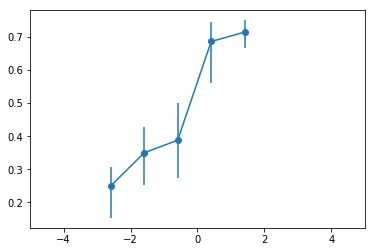

0141188936
3830
Average Rating = 3.656657963446475
Standard Deviation = 1.580189467267357


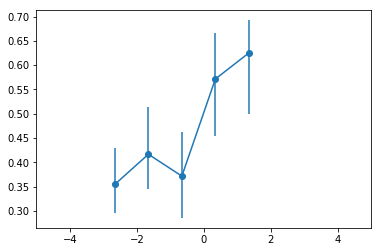

1455134767
3560
Average Rating = 4.341292134831461
Standard Deviation = 1.1792125129137228


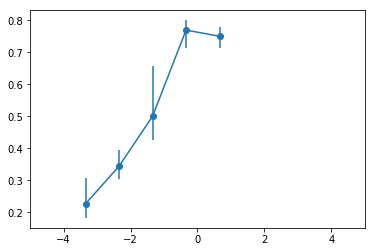

0452285216
2645
Average Rating = 3.9187145557655954
Standard Deviation = 1.4919473362854927


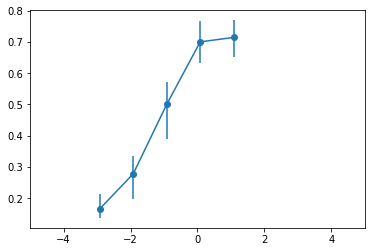

1892112000
2625
Average Rating = 1.9733333333333334
Standard Deviation = 1.686713720405207


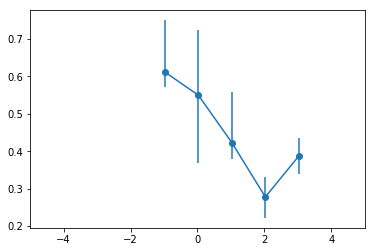

074356619X
2615
Average Rating = 2.9120458891013383
Standard Deviation = 1.7610368224585202


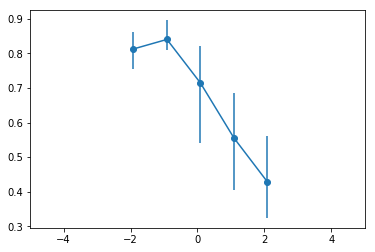

0786183616
2605
Average Rating = 3.132437619961612
Standard Deviation = 1.8883732573219243


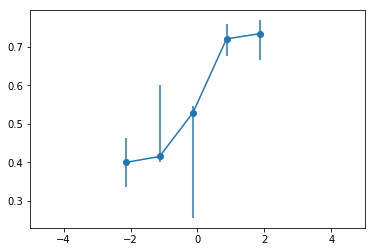

0307277674
2560
Average Rating = 3.09765625
Standard Deviation = 1.4611620398969916


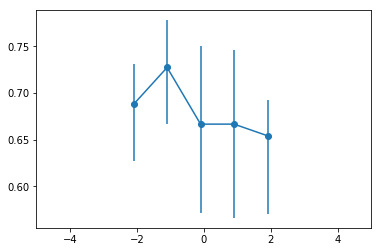

0805093079
2535
Average Rating = 3.329388560157791
Standard Deviation = 1.7653201543751476


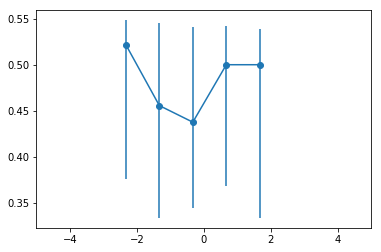

In [14]:
for i in many_reviews:
    X = []
    y = []
    item = df2.loc[df2['asin'] == i]
    print (i)
    print (item.size)
    average_rating = np.mean(item['overall'])
    print ("Average Rating =", average_rating)
    print ("Standard Deviation =", np.std(item['overall']))
    for index, row in item.iterrows():
        y.append(row['helpful'][0] / row['helpful'][1]) #float division
        #python 3 required, otherwise import division from future
        X.append(row['overall'] - average_rating)
    df_temp = pd.DataFrame({'y': y, 'X': X})
    uni_x = df_temp['X'].unique()
    y2 = []
    e = []
    e_lower = []
    for uni in uni_x:
        y2.append(df_temp.loc[df_temp['X'] == uni]['y'].median())
#         e.append(df_temp.loc[df_temp['X'] == uni]['y'].std())
        e.append(df_temp.loc[df_temp['X'] == uni]['y'].quantile(0.66) - df_temp.loc[df_temp['X'] == uni]['y'].median())
        e_lower.append(df_temp.loc[df_temp['X'] == uni]['y'].median() - df_temp.loc[df_temp['X'] == uni]['y'].quantile(0.33))

#         print ("0.66: ", df_temp.loc[df_temp['X'] == uni]['y'].quantile(0.66))
#         print ("0.5: ", df_temp.loc[df_temp['X'] == uni]['y'].quantile(0.5))
#         print ("Median: ", df_temp.loc[df_temp['X'] == uni]['y'].median())
#         print ("0.33: ", df_temp.loc[df_temp['X'] == uni]['y'].quantile(0.33))
    #     plot = plt.scatter(X, y)
#     plt.show(plot)
#     plot2 = plt.scatter(uni_x, y2)
#     plt.show(plot2)
    y3 = [x for _,x in sorted(zip(uni_x, y2))] # e2 sorted according to y
    e2 = [x for _,x in sorted(zip(uni_x, e))]
    e_lower2 = [x for _,x in sorted(zip(uni_x, e_lower))]
    x2 = sorted(uni_x)
    #print (Z)
    plt.xlim(-5, 5)
    plot3 = plt.errorbar(x2, y3, (e_lower2, e2), fmt='-o')
    plt.show(plot3)

In [67]:
# import seaborn as sns
# X = []
# y = []
# item = df2.loc[df2['asin'] == '0002007770']
# print (i)
# print (item.size)
# average_rating = np.mean(item['overall'])
# print ("Average Rating =", average_rating)
# print ("Standard Deviation =", np.std(item['overall']))
# for index, row in item.iterrows():
#     y.append(row['helpful'][0] / row['helpful'][1]) #float division
#     #python 3 required, otherwise import division from future
#     X.append(row['overall'] - average_rating)
# df_temp = pd.DataFrame({'y': y, 'X': X})
# uni_x = df_temp['X'].unique()
# y2 = []
# e = []
# for uni in uni_x:
#     y2.append(df_temp.loc[df_temp['X'] == uni]['y'].median()) 
#     e.append(df_temp.loc[df_temp['X'] == uni]['y'].std())

# # plot = plt.scatter(X, y)
# # plt.show(plot)
# # plot2 = plt.scatter(uni_x, y2)
# # plt.show(plot2)
# # y3 = sorted(y2)
# y3 = [x for _,x in sorted(zip(uni_x, y2))] # e2 sorted according to y
# e2 = [x for _,x in sorted(zip(uni_x, e))]
# x2 = sorted(uni_x)
# #print (Z)
# plt.errorbar(x2, y3, e2, fmt='-o')

In [23]:
many_reviews2 = item_df[item_df > 100].index.values
low_sd_items = []
for i in many_reviews2:
    item = df2.loc[df2['asin'] == i]
    sd = np.std(item['overall'])
    if (sd < 1):
        low_sd_items.append(i)
        print ("Standard Deviation =", sd)
    

Standard Deviation = 0.8625258717472545
Standard Deviation = 0.8172788341012921
Standard Deviation = 0.8942092888944354
Standard Deviation = 0.7888787217576404
Standard Deviation = 0.6398241946034864
Standard Deviation = 0.9282014988121832
Standard Deviation = 0.8419716882004635
Standard Deviation = 0.9489687551024775
Standard Deviation = 0.8001360405696247
Standard Deviation = 0.9817917181132706
Standard Deviation = 0.0
Standard Deviation = 0.3983284047761735
Standard Deviation = 0.3382879883877223
Standard Deviation = 0.4790895783894893
Standard Deviation = 0.9605439230452575
Standard Deviation = 0.8523720843550042


In [24]:
low_sd_items

['1495472418',
 'B00EYMXM2I',
 'B00IPI546E',
 '1941450008',
 '1484994566',
 '1630350184',
 '1482767775',
 '0312358377',
 '1630350222',
 '0761919945',
 'B00IA6QWP8',
 '1477805850',
 '1495498530',
 'B00KCE1ISM',
 '0345531566',
 '1491095555']

1495472418
367
Average Rating = 4.700272479564033
Standard Deviation = 0.8625258717472545


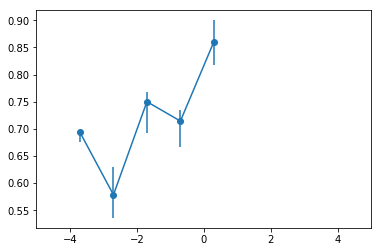

B00EYMXM2I
182
Average Rating = 4.708791208791209
Standard Deviation = 0.8172788341012921


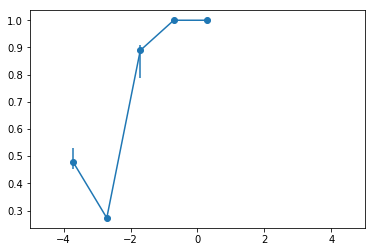

B00IPI546E
174
Average Rating = 4.545977011494253
Standard Deviation = 0.8942092888944354


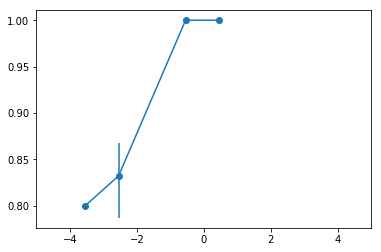

1941450008
172
Average Rating = 4.715116279069767
Standard Deviation = 0.7888787217576404


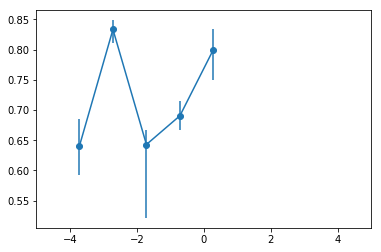

1484994566
160
Average Rating = 4.875
Standard Deviation = 0.6398241946034864


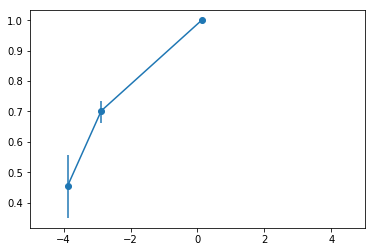

1630350184
143
Average Rating = 4.678321678321678
Standard Deviation = 0.9282014988121832


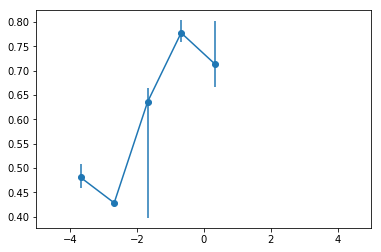

1482767775
135
Average Rating = 4.518518518518518
Standard Deviation = 0.8419716882004635


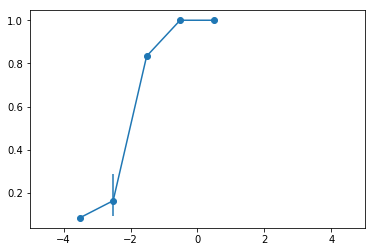

0312358377
126
Average Rating = 4.626984126984127
Standard Deviation = 0.9489687551024775


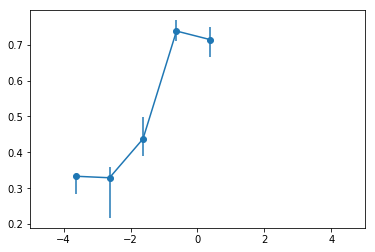

1630350222
122
Average Rating = 4.762295081967213
Standard Deviation = 0.8001360405696247


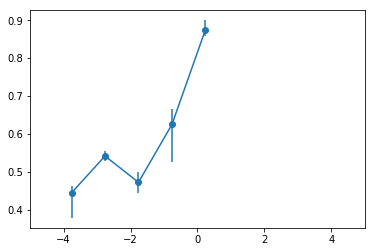

0761919945
119
Average Rating = 1.2941176470588236
Standard Deviation = 0.9817917181132706


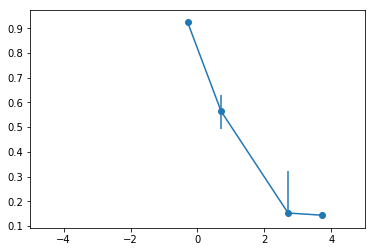

B00IA6QWP8
114
Average Rating = 5.0
Standard Deviation = 0.0


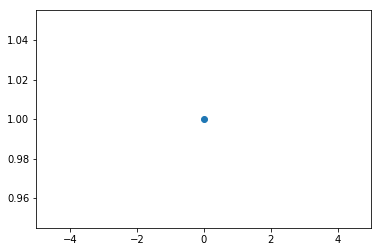

1477805850
113
Average Rating = 4.902654867256637
Standard Deviation = 0.3983284047761735


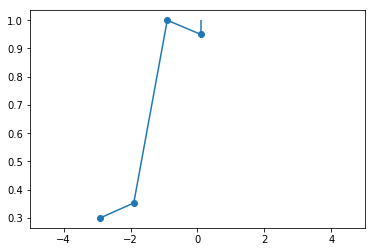

1495498530
111
Average Rating = 4.891891891891892
Standard Deviation = 0.3382879883877223


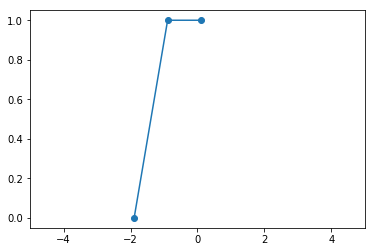

B00KCE1ISM
111
Average Rating = 4.882882882882883
Standard Deviation = 0.4790895783894893


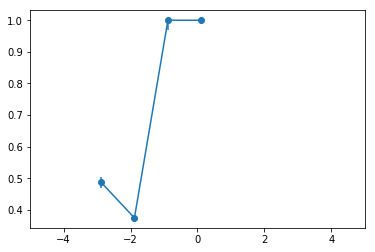

0345531566
110
Average Rating = 4.490909090909091
Standard Deviation = 0.9605439230452575


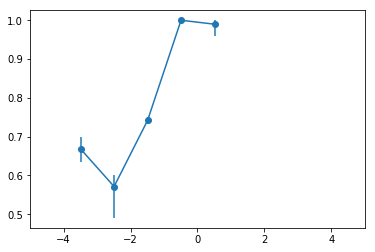

1491095555
109
Average Rating = 4.477064220183486
Standard Deviation = 0.8523720843550042


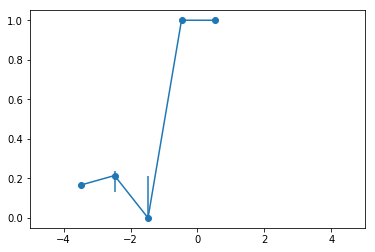

In [27]:
for i in low_sd_items:
    X = []
    y = []
    item = df2.loc[df2['asin'] == i]
    print (i)
    print (item.size//5)
    average_rating = np.mean(item['overall'])
    print ("Average Rating =", average_rating)
    print ("Standard Deviation =", np.std(item['overall']))
    for index, row in item.iterrows():
        y.append(row['helpful'][0] / row['helpful'][1]) #float division
        #python 3 required, otherwise import division from future
        X.append(row['overall'] - average_rating)
    df_temp = pd.DataFrame({'y': y, 'X': X})
    uni_x = df_temp['X'].unique()
    y2 = []
    e = []
    e_lower = []
    for uni in uni_x:
        y2.append(df_temp.loc[df_temp['X'] == uni]['y'].median())
#         e.append(df_temp.loc[df_temp['X'] == uni]['y'].std())
        e.append(df_temp.loc[df_temp['X'] == uni]['y'].quantile(0.66) - df_temp.loc[df_temp['X'] == uni]['y'].median())
        e_lower.append(df_temp.loc[df_temp['X'] == uni]['y'].median() - df_temp.loc[df_temp['X'] == uni]['y'].quantile(0.33))

#         print ("0.66: ", df_temp.loc[df_temp['X'] == uni]['y'].quantile(0.66))
#         print ("0.5: ", df_temp.loc[df_temp['X'] == uni]['y'].quantile(0.5))
#         print ("Median: ", df_temp.loc[df_temp['X'] == uni]['y'].median())
#         print ("0.33: ", df_temp.loc[df_temp['X'] == uni]['y'].quantile(0.33))
    #     plot = plt.scatter(X, y)
#     plt.show(plot)
#     plot2 = plt.scatter(uni_x, y2)
#     plt.show(plot2)
    y3 = [x for _,x in sorted(zip(uni_x, y2))] # e2 sorted according to y
    e2 = [x for _,x in sorted(zip(uni_x, e))]
    e_lower2 = [x for _,x in sorted(zip(uni_x, e_lower))]
    x2 = sorted(uni_x)
    #print (Z)
    plt.xlim(-5, 5)
    plot3 = plt.errorbar(x2, y3, (e_lower2, e2), fmt='-o')
    plt.show(plot3)

In [ ]:
# how can computed star average be equal to ineger every time.